<a href="https://colab.research.google.com/github/emrec-s/BDA-ProgressJournal-for-Mef/blob/main/Earthquakes%20Modelling%20BDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capstone for BDA
This project is created for BDA Capstone project. We will evaluate the earthquake dataset to develop a model.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/earthquake.csv')
df = df.iloc[: , 1:]

In [ ]:
df.isnull().sum()

number                0
time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               3
rms               27420
net                   0
id                    0
updated               0
place                 0
type                  0
status                0
locationSource        0
magSource             0
year                  0
dtype: int64

In [ ]:
df.sort_values(by='time',ascending=True)

,number,time,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,type,status,locationSource,magSource,year
0,582963,1976-01-01 00:04:05,38.441,21.633,19.0,4.7,mb,NaN,us,usp0000e7d,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
1,582954,1976-01-01 02:19:17,38.304,21.575,33.0,4.0,mb,NaN,us,usp0000e7h,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
2,582927,1976-01-01 13:34:17,38.606,22.028,53.0,3.2,mb,NaN,us,usp0000e7s,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
3,582866,1976-01-02 22:44:46,38.567,21.806,39.0,4.6,mb,NaN,us,usp0000e8u,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
4,582854,1976-01-03 05:54:36,38.477,21.641,27.0,4.3,mb,NaN,us,usp0000e90,2014-11-06 23:21:33,Greece,earthquake,reviewed,us,us,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54980,1426726,2008-12-28 05:22:59,35.800,27.968,71.4,3.5,md,1.45,us,usp000grpe,2014-11-07 01:38:03,"Dodecanese Islands, Greece",earthquake,reviewed,us,isk,2008
54981,1426627,2008-12-28 08:52:24,37.800,29.187,4.9,3.8,ml,NaN,us,usp000grq2,2014-11-07 01:38:03,western Turkey,earthquake,reviewed,isk,isk,2008
54982,1426496,2008-12-28 16:22:04,36.276,23.351,0.0,3.3,ml,NaN,us,usp000grqk,2014-11-07 01:38:03,southern Greece,earthquake,reviewed,the,the,2008
54983,1426479,2008-12-28 17:32:03,37.178,22.090,42.3,4.5,mb,1.22,us,usp000grqp,2014-11-07 01:38:03,southern Greece,earthquake,reviewed,us,us,2008


In [ ]:
df['rms'] = df['rms'].fillna(df['rms'].mean())

In [ ]:
df = df.dropna(subset=['type'])

In [ ]:
df.nunique()

number            54985
time              54756
latitude           8875
longitude         13331
depth              1124
mag                  66
magType              10
rms                 176
net                   1
id                54757
updated            4282
place                60
type                  3
status                1
locationSource       22
magSource            51
year                 33
dtype: int64

In [ ]:
NaN_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (df[feature].count() < df.shape[0]))]
NaN_features

[]

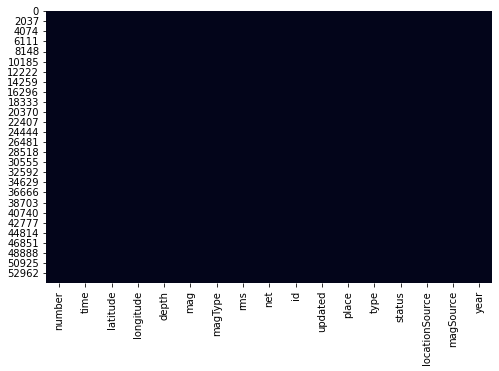

In [ ]:
plt.figure(figsize = (8, 5))

sns.heatmap(df.isnull(), cbar=False)

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt

import pickle
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## for machine learning

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

from tensorflow import keras

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Masking

In [ ]:
df_eq = df

df_eq = df_eq[["time", "mag", "longitude", "latitude", "depth"]]

df_eq["time"] = pd.to_datetime(df_eq["time"])
df_eq["timestamps"] = df_eq["time"]
# df_eq.set_index('time', inplace=True)


df_eq

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,mag,longitude,latitude,depth,timestamps
0,1976-01-01 00:04:05,4.7,21.633,38.441,19.0,1976-01-01 00:04:05
1,1976-01-01 02:19:17,4.0,21.575,38.304,33.0,1976-01-01 02:19:17
2,1976-01-01 13:34:17,3.2,22.028,38.606,53.0,1976-01-01 13:34:17
3,1976-01-02 22:44:46,4.6,21.806,38.567,39.0,1976-01-02 22:44:46
4,1976-01-03 05:54:36,4.3,21.641,38.477,27.0,1976-01-03 05:54:36
...,...,...,...,...,...,...
54980,2008-12-28 05:22:59,3.5,27.968,35.800,71.4,2008-12-28 05:22:59
54981,2008-12-28 08:52:24,3.8,29.187,37.800,4.9,2008-12-28 08:52:24
54982,2008-12-28 16:22:04,3.3,23.351,36.276,0.0,2008-12-28 16:22:04
54983,2008-12-28 17:32:03,4.5,22.090,37.178,42.3,2008-12-28 17:32:03


In [ ]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54985 entries, 0 to 54984
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        54985 non-null  datetime64[ns]
 1   mag         54985 non-null  float64       
 2   longitude   54985 non-null  float64       
 3   latitude    54985 non-null  float64       
 4   depth       54985 non-null  float64       
 5   timestamps  54985 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.9 MB


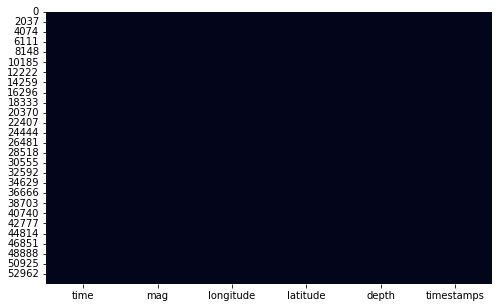

In [ ]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_eq.isnull(), cbar=False)

In [ ]:
df_eq[df_eq.duplicated('timestamps')]

,time,mag,longitude,latitude,depth,timestamps
563,1978-03-01 22:51:05,4.6,27.134,35.967,89.0,1978-03-01 22:51:05
565,1978-03-01 23:27:58,4.5,42.895,40.974,33.0,1978-03-01 23:27:58
869,1979-03-01 02:50:33,4.2,23.262,39.331,10.0,1979-03-01 02:50:33
871,1979-03-02 15:35:28,4.7,46.676,41.094,33.0,1979-03-02 15:35:28
1595,1981-03-01 01:09:35,3.5,23.302,38.193,10.0,1981-03-01 01:09:35
...,...,...,...,...,...,...
51790,2008-03-01 15:17:20,4.0,21.770,36.310,3.0,2008-03-01 15:17:20
51792,2008-03-01 16:06:26,3.0,21.950,38.410,11.0,2008-03-01 16:06:26
51794,2008-03-01 20:41:23,3.4,25.758,35.718,36.0,2008-03-01 20:41:23
51796,2008-03-01 20:48:22,3.5,21.820,36.190,5.0,2008-03-01 20:48:22


In [ ]:
# Dropping rows
df_eq = df_eq.drop_duplicates(subset=['timestamps'])

df_eq["timestamps"].diff().describe()

count                        54755
mean     0 days 05:16:55.660560679
std      0 days 11:47:56.903585926
min                0 days 00:00:01
25%                0 days 00:32:43
50%                0 days 01:48:02
75%                0 days 05:04:19
max               12 days 11:25:33
Name: timestamps, dtype: object

In [ ]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54756 entries, 0 to 54984
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        54756 non-null  datetime64[ns]
 1   mag         54756 non-null  float64       
 2   longitude   54756 non-null  float64       
 3   latitude    54756 non-null  float64       
 4   depth       54756 non-null  float64       
 5   timestamps  54756 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.9 MB


In [ ]:
df_eq[df_eq.duplicated('timestamps')]

,time,mag,longitude,latitude,depth,timestamps


In [ ]:
df_eq = df_eq.drop_duplicates(subset=['timestamps'])

df_eq["timestamps"].diff().describe()

count                        54755
mean     0 days 05:16:55.660560679
std      0 days 11:47:56.903585926
min                0 days 00:00:01
25%                0 days 00:32:43
50%                0 days 01:48:02
75%                0 days 05:04:19
max               12 days 11:25:33
Name: timestamps, dtype: object

In [ ]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54756 entries, 0 to 54984
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        54756 non-null  datetime64[ns]
 1   mag         54756 non-null  float64       
 2   longitude   54756 non-null  float64       
 3   latitude    54756 non-null  float64       
 4   depth       54756 non-null  float64       
 5   timestamps  54756 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 2.9 MB


In [ ]:
# Number 1: Time intervals between consecutive earthquakes.

df_eq["time_diff"] = df_eq["timestamps"].diff()

df_eq["time_diff_float"] = df_eq["time_diff"].apply(lambda x: x.total_seconds())

#Number 2: the rolling of magnitudes from the last 10 earthquakes

df_eq["mag_roll_10"] = df_eq["mag"].rolling(window=10).mean()

df_eq.dropna(inplace = True)

In [ ]:
df_eq.describe().T

,count,mean,std,min,25%,50%,75%,max
mag,54747.0,3.290619,0.634861,0.7,2.9,3.2,3.6,7.6
longitude,54747.0,25.424956,4.867724,20.0,21.793,24.096,27.679,47.997
latitude,54747.0,38.461659,2.02803,30.079,37.2495,38.66,39.747,44.988
depth,54747.0,16.745962,16.106329,0.0,10.0,10.0,22.0,203.9
time_diff,54747,0 days 05:16:54.296783385,0 days 11:47:57.508372316,0 days 00:00:01,0 days 00:32:43,0 days 01:48:02,0 days 05:04:18,12 days 11:25:33
time_diff_float,54747.0,19014.296783,42477.508372,1.0,1963.0,6482.0,18258.0,1077933.0
mag_roll_10,54747.0,3.290621,0.375712,1.9,3.05,3.27,3.49,5.11


In [ ]:
df_eq[df_eq["time_diff_float"] > 86400].shape

(2317, 9)

In [ ]:
df_eq[df_eq["time_diff_float"] > 86400]

,time,mag,longitude,latitude,depth,timestamps,time_diff,time_diff_float,mag_roll_10
12,1976-01-06 20:11:32,3.6,21.840,38.444,33.0,1976-01-06 20:11:32,2 days 21:26:07,249967.0,4.08
13,1976-01-10 07:11:19,4.2,27.786,36.855,30.0,1976-01-10 07:11:19,3 days 10:59:47,298787.0,4.04
15,1976-01-12 17:50:24,5.1,32.529,34.318,33.0,1976-01-12 17:50:24,1 days 20:10:47,159047.0,4.02
20,1976-01-18 15:10:32,5.7,20.600,38.896,33.0,1976-01-18 15:10:32,4 days 04:39:26,362366.0,4.52
21,1976-01-20 00:02:52,3.7,21.637,38.120,54.0,1976-01-20 00:02:52,1 days 08:52:20,118340.0,4.52
...,...,...,...,...,...,...,...,...,...
54951,2008-12-16 04:38:58,3.5,23.610,34.740,13.0,2008-12-16 04:38:58,1 days 03:04:53,97493.0,3.76
54953,2008-12-17 19:02:15,3.7,21.710,38.462,43.2,2008-12-17 19:02:15,1 days 06:54:22,111262.0,3.88
54954,2008-12-18 21:24:01,3.1,25.974,39.233,10.0,2008-12-18 21:24:01,1 days 02:21:46,94906.0,3.78
54956,2008-12-21 00:42:29,3.5,26.310,34.670,36.0,2008-12-21 00:42:29,2 days 03:00:57,183657.0,3.50


In [ ]:
min_date = df_eq["time"].min().date()

min_date

datetime.date(1976, 1, 3)

In [ ]:
max_date = df_eq["time"].max().date()

max_date

datetime.date(2008, 12, 28)

In [ ]:
type(df_eq["time"].max().date())

datetime.date

In [ ]:
start_date = min_date

number_of_days = (max_date - min_date).days
print("number_of_days", number_of_days)
date_list = []
for day in range(number_of_days):
  a_date = (start_date + datetime.timedelta(days = day))
  date_list.append(a_date)

print(date_list[1], type(date_list[0]))

number_of_days 12048
1976-01-04 <class 'datetime.date'>


In [ ]:
df_eq.set_index('time', inplace=True)

In [ ]:
df_eq

,mag,longitude,latitude,depth,timestamps,time_diff,time_diff_float,mag_roll_10
time,,,,,,,,
1976-01-03 15:44:13,4.2,21.967,38.538,52.0,1976-01-03 15:44:13,0 days 00:40:20,2420.0,4.18
1976-01-03 16:59:51,3.6,22.048,38.601,57.0,1976-01-03 16:59:51,0 days 01:15:38,4538.0,4.07
1976-01-03 22:45:25,3.7,21.440,38.258,39.0,1976-01-03 22:45:25,0 days 05:45:34,20734.0,4.04
1976-01-06 20:11:32,3.6,21.840,38.444,33.0,1976-01-06 20:11:32,2 days 21:26:07,249967.0,4.08
1976-01-10 07:11:19,4.2,27.786,36.855,30.0,1976-01-10 07:11:19,3 days 10:59:47,298787.0,4.04
...,...,...,...,...,...,...,...,...
2008-12-28 05:22:59,3.5,27.968,35.800,71.4,2008-12-28 05:22:59,0 days 06:30:35,23435.0,3.56
2008-12-28 08:52:24,3.8,29.187,37.800,4.9,2008-12-28 08:52:24,0 days 03:29:25,12565.0,3.62
2008-12-28 16:22:04,3.3,23.351,36.276,0.0,2008-12-28 16:22:04,0 days 07:29:40,26980.0,3.63


In [ ]:
df_w = pd.DataFrame() 

df_w['mag_max'] = df_eq.mag.resample('D').max() 
df_w

,mag_max
time,
1976-01-03,4.2
1976-01-04,NaN
1976-01-05,NaN
1976-01-06,3.6
1976-01-07,NaN
...,...
2008-12-24,4.4
2008-12-25,3.7
2008-12-26,2.9


In [ ]:
df_daily = pd.DataFrame() 
# AS is year-start frequency

df_daily['mag_max'] = df_eq.mag.resample('D').max() # What is the max of events
df_daily['event_count'] = df_eq.mag.resample('D').count() #How many events happened 
df_daily['mag_mean'] = df_eq.mag.resample('D').mean() #What is the mean of values for that particular day
df_daily['mag_sum'] = df_eq.mag.resample('D').sum() # What is the sum of moments
df_daily['mag_scatter'] = (df_eq.mag.resample('D').std()) # What is the scatter of event magnitudes
df_daily["mag_roll_10"] = df_daily["mag_mean"].rolling(window=10).mean()


df_daily['longitude_mean'] = df_eq.longitude.resample('D').mean() #Mean location of events 
df_daily['longitude_std'] = df_eq.longitude.resample('D').std() #Std location of events 

df_daily['latitude_mean'] = df_eq.latitude.resample('D').mean() #Mean location of events 
df_daily['latitude_std'] = df_eq.latitude.resample('D').std() #Std location of events 

df_daily['depth_mean'] = df_eq.depth.resample('D').mean() #Mean location of events 
df_daily['depth_std'] = df_eq.depth.resample('D').std() #Std location of events 

df_daily['time_diff_float_mean'] = df_eq.time_diff_float.resample('D').mean() #Event spacing 
df_daily['time_diff_float_std'] = df_eq.time_diff_float.resample('D').std() #Std location of events 


df_daily

,mag_max,event_count,mag_mean,mag_sum,mag_scatter,mag_roll_10,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std
time,,,,,,,,,,,,,,
1976-01-03,4.2,3,3.833333,11.5,0.321455,NaN,21.818333,0.330140,38.465667,0.182582,49.333333,9.291573,9230.666667,10018.307708
1976-01-04,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-05,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-06,3.6,1,3.600000,3.6,NaN,NaN,21.840000,NaN,38.444000,NaN,33.000000,NaN,249967.000000,NaN
1976-01-07,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24,4.4,7,3.842857,26.9,0.276026,NaN,28.132714,2.805873,37.612143,0.574759,7.657143,6.311856,18051.714286,21725.746552
2008-12-25,3.7,9,3.133333,28.2,0.254951,NaN,29.995222,2.111098,37.740111,0.792029,10.444444,12.313317,9540.111111,16642.884188
2008-12-26,2.9,1,2.900000,2.9,NaN,NaN,40.247000,NaN,39.204000,NaN,8.600000,NaN,80286.000000,NaN


In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12049 entries, 1976-01-03 to 2008-12-28
Freq: D
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mag_max               9604 non-null   float64
 1   event_count           12049 non-null  int64  
 2   mag_mean              9604 non-null   float64
 3   mag_sum               12049 non-null  float64
 4   mag_scatter           7600 non-null   float64
 5   mag_roll_10           4469 non-null   float64
 6   longitude_mean        9604 non-null   float64
 7   longitude_std         7600 non-null   float64
 8   latitude_mean         9604 non-null   float64
 9   latitude_std          7600 non-null   float64
 10  depth_mean            9604 non-null   float64
 11  depth_std             7600 non-null   float64
 12  time_diff_float_mean  9604 non-null   float64
 13  time_diff_float_std   7600 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1.4 MB

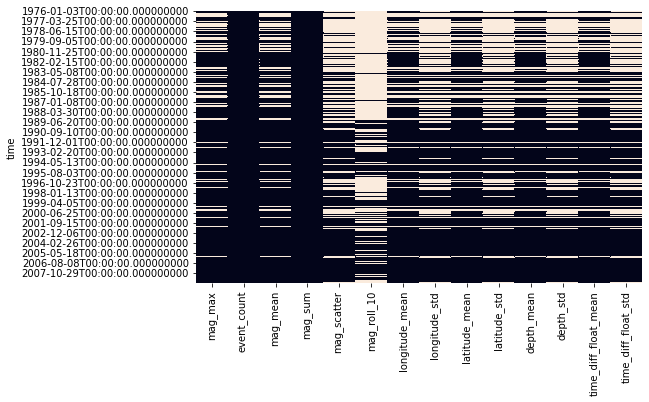

In [ ]:
plt.figure(figsize = (8, 5))
sns.heatmap(df_daily.isnull(), cbar=False)


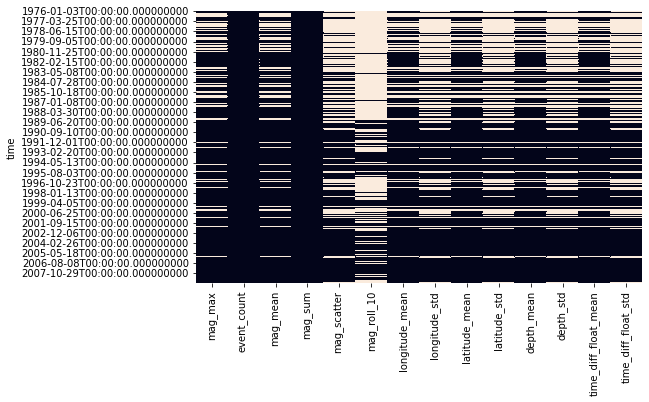

In [ ]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_daily.isnull(), cbar=False)

In [ ]:
df_daily_clean = df_daily[df_daily.index > "1972-01-01"]

df_daily_clean.drop(columns = ["mag_roll_10"], inplace = True)

df_daily_clean

,mag_max,event_count,mag_mean,mag_sum,mag_scatter,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std
time,,,,,,,,,,,,,
1976-01-03,4.2,3,3.833333,11.5,0.321455,21.818333,0.330140,38.465667,0.182582,49.333333,9.291573,9230.666667,10018.307708
1976-01-04,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-05,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976-01-06,3.6,1,3.600000,3.6,NaN,21.840000,NaN,38.444000,NaN,33.000000,NaN,249967.000000,NaN
1976-01-07,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24,4.4,7,3.842857,26.9,0.276026,28.132714,2.805873,37.612143,0.574759,7.657143,6.311856,18051.714286,21725.746552
2008-12-25,3.7,9,3.133333,28.2,0.254951,29.995222,2.111098,37.740111,0.792029,10.444444,12.313317,9540.111111,16642.884188
2008-12-26,2.9,1,2.900000,2.9,NaN,40.247000,NaN,39.204000,NaN,8.600000,NaN,80286.000000,NaN


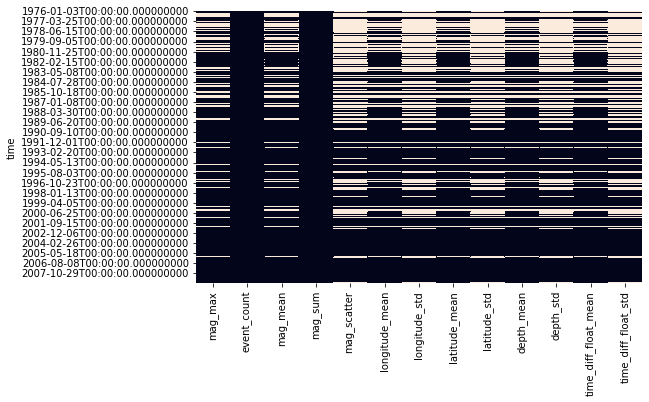

In [ ]:
plt.figure(figsize = (8, 5))

sns.heatmap(df_daily_clean.isnull(), cbar=False)

In [ ]:
df_daily_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12049 entries, 1976-01-03 to 2008-12-28
Freq: D
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mag_max               9604 non-null   float64
 1   event_count           12049 non-null  int64  
 2   mag_mean              9604 non-null   float64
 3   mag_sum               12049 non-null  float64
 4   mag_scatter           7600 non-null   float64
 5   longitude_mean        9604 non-null   float64
 6   longitude_std         7600 non-null   float64
 7   latitude_mean         9604 non-null   float64
 8   latitude_std          7600 non-null   float64
 9   depth_mean            9604 non-null   float64
 10  depth_std             7600 non-null   float64
 11  time_diff_float_mean  9604 non-null   float64
 12  time_diff_float_std   7600 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [ ]:
#Source: https://medium.com/@drnesr/filling-gaps-of-a-time-series-using-python-d4bfddd8c460
df_daily_clean.interpolate('time', inplace = True)
df_daily_clean

,mag_max,event_count,mag_mean,mag_sum,mag_scatter,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std
time,,,,,,,,,,,,,
1976-01-03,4.20,3,3.833333,11.5,0.321455,21.818333,0.330140,38.465667,0.182582,49.333333,9.291573,9230.666667,10018.307708
1976-01-04,4.00,0,3.755556,0.0,0.336142,21.825556,0.882907,38.458444,0.301355,43.888889,10.893648,89476.111111,33506.472999
1976-01-05,3.80,0,3.677778,0.0,0.350829,21.832778,1.435673,38.451222,0.420128,38.444444,12.495723,169721.555556,56994.638290
1976-01-06,3.60,1,3.600000,3.6,0.365516,21.840000,1.988440,38.444000,0.538900,33.000000,14.097798,249967.000000,80482.803581
1976-01-07,3.75,0,3.675000,0.0,0.380203,22.584125,2.541207,38.226000,0.657673,35.875000,15.699872,231335.875000,103970.968872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-24,4.40,7,3.842857,26.9,0.276026,28.132714,2.805873,37.612143,0.574759,7.657143,6.311856,18051.714286,21725.746552
2008-12-25,3.70,9,3.133333,28.2,0.254951,29.995222,2.111098,37.740111,0.792029,10.444444,12.313317,9540.111111,16642.884188
2008-12-26,2.90,1,2.900000,2.9,0.398123,40.247000,2.491238,39.204000,1.462150,8.600000,11.895822,80286.000000,16662.878132


In [ ]:
df_daily_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12049 entries, 1976-01-03 to 2008-12-28
Freq: D
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mag_max               12049 non-null  float64
 1   event_count           12049 non-null  int64  
 2   mag_mean              12049 non-null  float64
 3   mag_sum               12049 non-null  float64
 4   mag_scatter           12049 non-null  float64
 5   longitude_mean        12049 non-null  float64
 6   longitude_std         12049 non-null  float64
 7   latitude_mean         12049 non-null  float64
 8   latitude_std          12049 non-null  float64
 9   depth_mean            12049 non-null  float64
 10  depth_std             12049 non-null  float64
 11  time_diff_float_mean  12049 non-null  float64
 12  time_diff_float_std   12049 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.3 MB


In [ ]:
NaN_featuresx = [feature for feature in df_daily_clean.columns if ((df_daily_clean[feature].dtypes != 'O') & (df_daily_clean[feature].count() < df_daily_clean.shape[0]))]
NaN_featuresx

[]

In [ ]:
df_eq = df_daily_clean
df_eq.shape

(12049, 13)

In [ ]:
## Large earthquakes labeling:
label = []
cnt = 0
for i, mag in enumerate(df_eq["mag_max"]):
    if (mag>5.5):
        cnt = cnt + 1
        label.append(int(cnt))
    else:
        label.append(0)

df_eq["large_eq_label"] = label

In [ ]:
df_eq.describe().T

,count,mean,std,min,25%,50%,75%,max
mag_max,12049.0,4.006216,0.599048,1.200000,3.600000,4.000000,4.400000,7.600000e+00
event_count,12049.0,4.543697,5.731901,0.000000,1.000000,3.000000,6.000000,1.010000e+02
mag_mean,12049.0,3.539276,0.551708,1.200000,3.155556,3.466667,3.900000,5.900000e+00
mag_sum,12049.0,14.951573,18.683736,0.000000,3.400000,9.300000,21.100000,3.473000e+02
mag_scatter,12049.0,0.485652,0.266566,0.000000,0.294958,0.448445,0.634948,2.192031e+00
longitude_mean,12049.0,25.778482,4.312835,20.002000,22.976000,24.853000,27.272000,4.798400e+01
longitude_std,12049.0,3.669774,3.152305,0.000000,1.519307,2.845151,4.749383,1.917532e+01
latitude_mean,12049.0,38.380850,1.646365,30.222000,37.440000,38.471000,39.382500,4.495200e+01
latitude_std,12049.0,1.636996,0.985549,0.000000,0.931260,1.558463,2.208540,6.730949e+00
depth_mean,12049.0,21.159164,16.244815,0.000000,10.000000,16.500000,26.340000,2.039000e+02


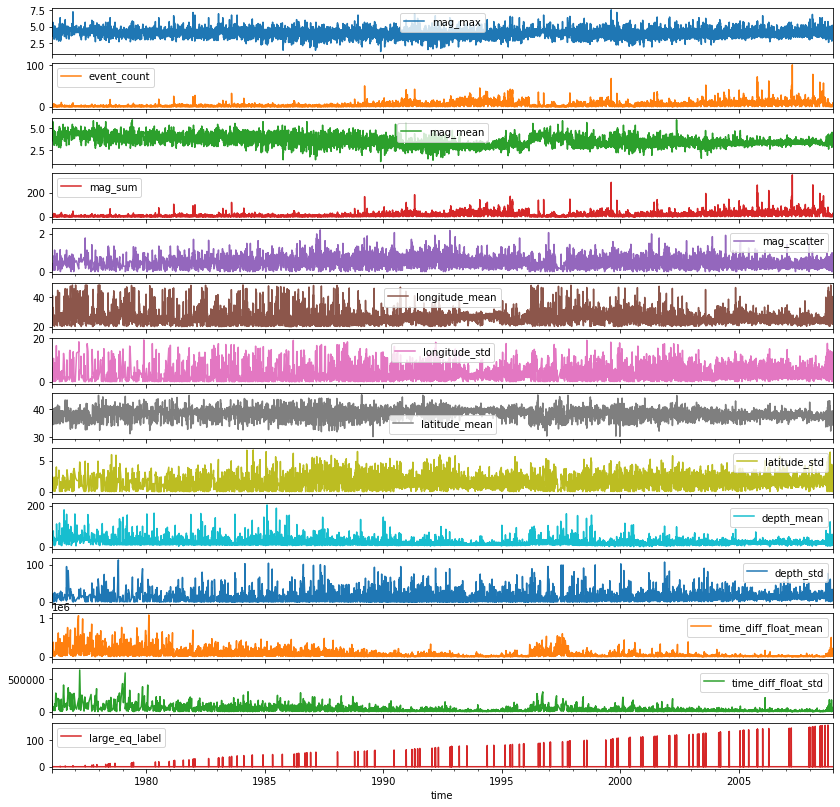

In [ ]:
df_eq.plot(subplots=True,figsize=(14,14));

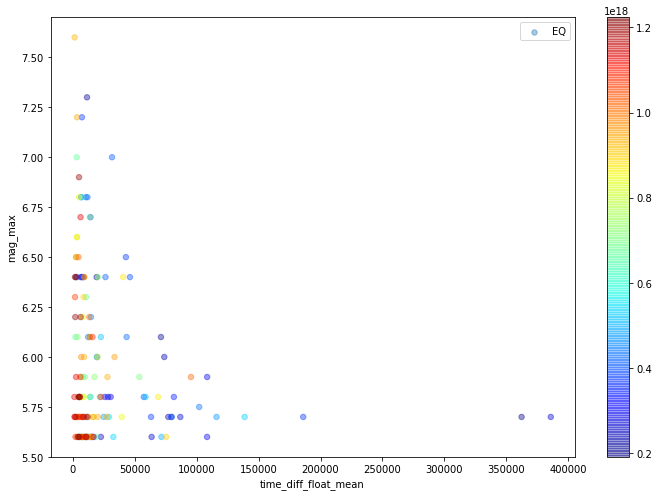

In [ ]:
large_eq = df_eq[df_eq["large_eq_label"]>0]

ax = plt.gca()


large_eq.plot(kind="scatter", x="time_diff_float_mean", y="mag_max",
    s=30, label="EQ",
    c=large_eq.index, cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7), ax = ax
)
plt.legend()

plt.tight_layout()

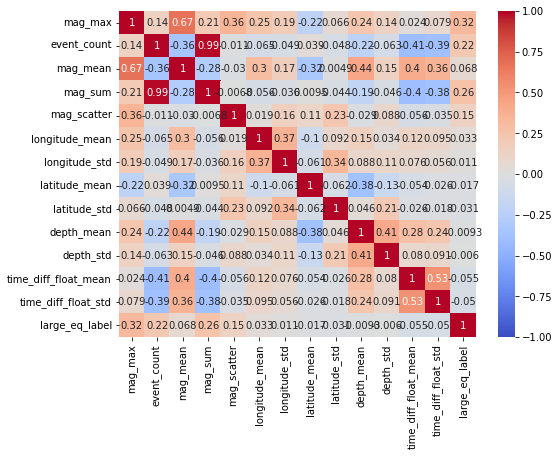

In [ ]:
df_corr = df_eq.corr()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(8,6))
sns.heatmap(df_corr,
        vmin=-1,
        cmap='coolwarm',
        annot=True);
# plt.savefig("../plots/Loma_prieta_EDA_corr_plots.png")

In [ ]:
df_eq.head(1)

,mag_max,event_count,mag_mean,mag_sum,mag_scatter,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std,large_eq_label
time,,,,,,,,,,,,,,
1976-01-03,4.2,3,3.833333,11.5,0.321455,21.818333,0.33014,38.465667,0.182582,49.333333,9.291573,9230.666667,10018.307708,0


Text(0, 0.5, 'Latitude')

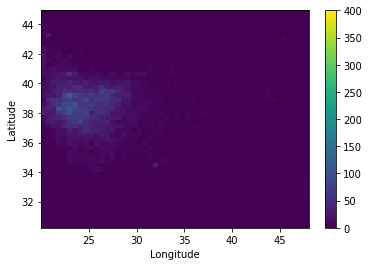

In [ ]:
df_eq_plot = df_eq[df_eq["depth_mean"]<50]

plt.hist2d(df_eq_plot['longitude_mean'], df_eq_plot['latitude_mean'], bins=(50, 50), vmax=200)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Depth (km)')

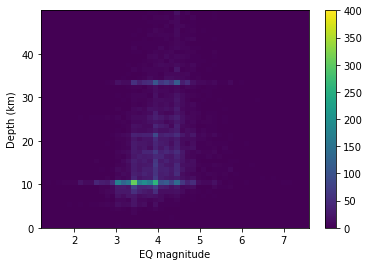

In [ ]:
df_eq_plot = df_eq[df_eq["depth_mean"]<50]
plt.hist2d(df_eq_plot['mag_max'], df_eq_plot['depth_mean'], bins=(50, 50), vmax=200)
plt.colorbar()
plt.xlabel('magnitude')
plt.ylabel('Depth (km)')

In [ ]:
df_eq["time_diff_float_mean"].describe()

count    1.204900e+04
mean     7.438783e+04
std      1.073136e+05
min      8.744752e+02
25%      1.283157e+04
50%      3.105300e+04
75%      9.205700e+04
max      1.077933e+06
Name: time_diff_float_mean, dtype: float64

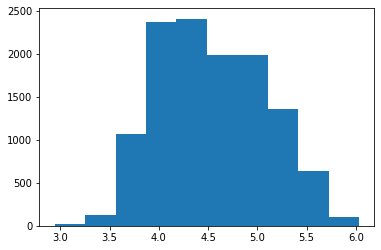

In [ ]:
plt.hist(np.log10(df_eq["time_diff_float_mean"]));

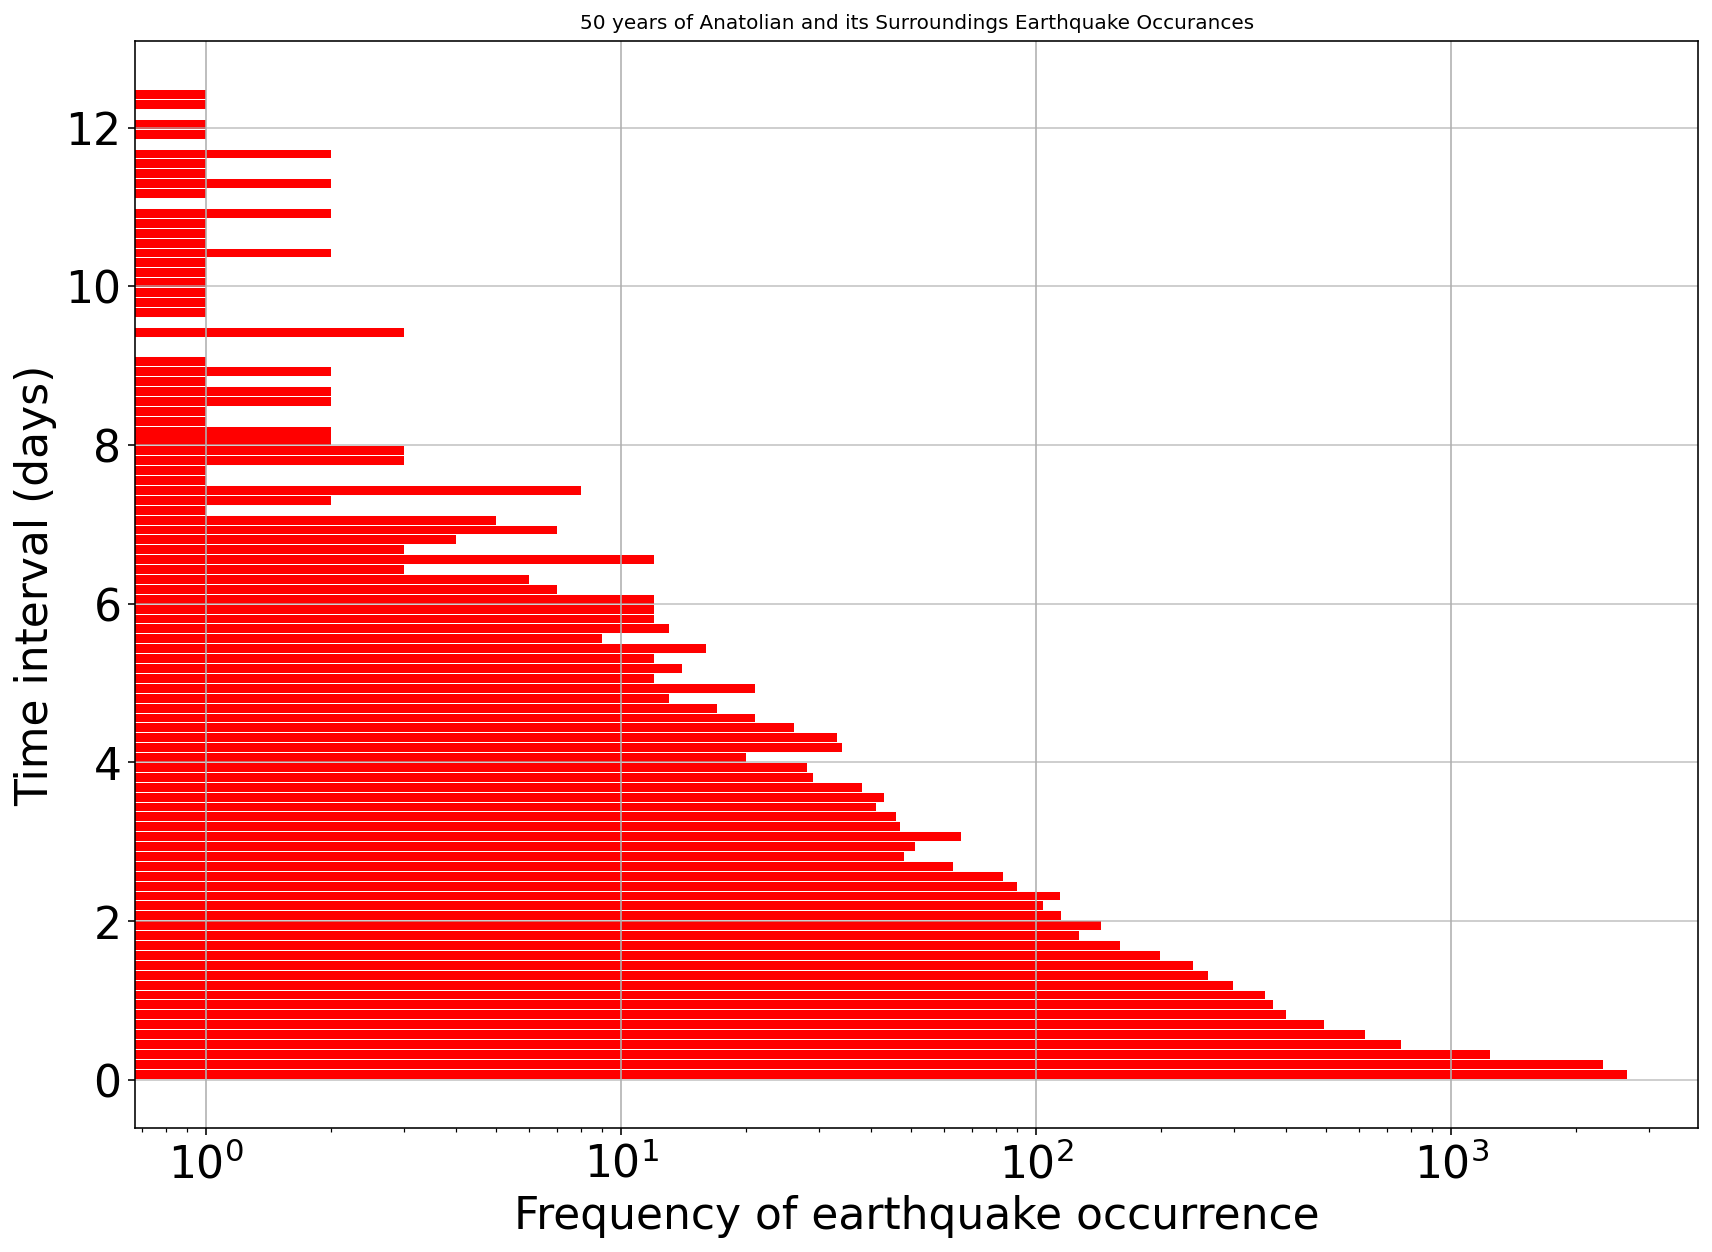

In [ ]:
df_eq_plot = df_eq.copy()
df_eq_plot["time_days"] = (np.array(df_eq_plot["time_diff_float_mean"])/86_400)


%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (14, 10));


df_eq_plot["time_days"].plot.hist(grid=True, bins=100, rwidth=0.9,orientation="horizontal",
                   color='red')

plt.title('50 years of Anatolian and its Surroundings Earthquake Occurances',fontsize = 10)
plt.ylabel('Time interval (days)',fontsize = 22)
plt.xlabel('Frequency of earthquake occurrence',fontsize = 22)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

# plt.ylim(0, 6)
plt.grid(axis='y', alpha=0.75)

plt.xscale('log')


plt.savefig('/content/')

In [ ]:
df_eq_model = df_eq.drop(columns = ["large_eq_label"])

train_size = int(len(df_eq_model)* 0.9)
test_size = len(df_eq_model) - train_size
train, test = df_eq_model.iloc[0:train_size], df_eq_model.iloc[train_size:len(df_eq_model)]

print(train.shape, test.shape)

(10844, 13) (1205, 13)


In [ ]:
train.head(5)


,mag_max,event_count,mag_mean,mag_sum,mag_scatter,longitude_mean,longitude_std,latitude_mean,latitude_std,depth_mean,depth_std,time_diff_float_mean,time_diff_float_std
time,,,,,,,,,,,,,
1976-01-03,4.20,3,3.833333,11.5,0.321455,21.818333,0.330140,38.465667,0.182582,49.333333,9.291573,9230.666667,10018.307708
1976-01-04,4.00,0,3.755556,0.0,0.336142,21.825556,0.882907,38.458444,0.301355,43.888889,10.893648,89476.111111,33506.472999
1976-01-05,3.80,0,3.677778,0.0,0.350829,21.832778,1.435673,38.451222,0.420128,38.444444,12.495723,169721.555556,56994.638290
1976-01-06,3.60,1,3.600000,3.6,0.365516,21.840000,1.988440,38.444000,0.538900,33.000000,14.097798,249967.000000,80482.803581
1976-01-07,3.75,0,3.675000,0.0,0.380203,22.584125,2.541207,38.226000,0.657673,35.875000,15.699872,231335.875000,103970.968872


In [ ]:
f_columns = ['event_count', 'mag_mean', 'mag_sum', 'mag_scatter',
       'longitude_mean', 'longitude_std', 'latitude_mean', 'latitude_std',
       'depth_mean', 'depth_std', 'time_diff_float_mean',
       'time_diff_float_std']

f_transformer = RobustScaler()
mag_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
mag_transformer = mag_transformer.fit(train[["mag_max"]])

In [ ]:
f_transformer.get_params()

{'copy': True,
 'quantile_range': (25.0, 75.0),
 'unit_variance': False,
 'with_centering': True,
 'with_scaling': True}

In [ ]:
train.loc[:,f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train["mag_max"] = mag_transformer.transform(train[["mag_max"]])

test.loc[:,f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test["mag_max"] = mag_transformer.transform(test[["mag_max"]])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
def create_dataset(X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)- time_steps):
        v = X.iloc[i: (i + time_steps)].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
TIME_STEPS = 120

X_train, y_train = create_dataset(train, train["mag_max"], time_steps = TIME_STEPS)

X_test, y_test = create_dataset(test, test["mag_max"], time_steps= TIME_STEPS)

In [ ]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(10724, 120, 13) (10724,)
(1085, 120, 13) (1085,)


In [ ]:
X_train[0][0]

array([ 0.25      ,  0.25      ,  0.4       ,  0.22972973, -0.41326515,
       -0.69755461, -0.7543504 , -0.0599921 , -1.00744485,  1.93399551,
        0.01810367, -0.33168352, -0.35529331])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128, input_shape = (X_train.shape[1], X_train.shape[2]),
                                   return_sequences = True))
model.add(keras.layers.LeakyReLU(alpha = 0.5))
model.add(keras.layers.LSTM(units=128,
                                   return_sequences = True))
model.add(keras.layers.LeakyReLU(alpha = 0.5))
model.add(keras.layers.Dropout(rate = 0.3))
model.add(keras.layers.LSTM(units=64,
                                   return_sequences = False))
model.add(keras.layers.Dropout(rate = 0.3))
model.add(keras.layers.Dense(units = 1))

In [ ]:
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=32,
            input_shape = (X_train.shape[1], X_train.shape[2])
        )
    )
)
# Adding dropout layer to regularize complexities 
model.add(keras.layers.Dropout(rate = 0.7))

# Add output layer
model.add(keras.layers.Dense(units = 1))

In [ ]:
# Compiling 
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.33, 
    shuffle = False 
)

Epoch 1/10
225/225 [==============================] - 22s 79ms/step - loss: 0.7305 - val_loss: 0.5003
Epoch 2/10
225/225 [==============================] - 17s 76ms/step - loss: 0.6031 - val_loss: 0.4913
Epoch 3/10
225/225 [==============================] - 17s 76ms/step - loss: 0.5639 - val_loss: 0.4905
Epoch 4/10
225/225 [==============================] - 17s 75ms/step - loss: 0.5446 - val_loss: 0.4926
Epoch 5/10
225/225 [==============================] - 17s 75ms/step - loss: 0.5284 - val_loss: 0.4895
Epoch 6/10
225/225 [==============================] - 18s 78ms/step - loss: 0.5305 - val_loss: 0.4885
Epoch 7/10
225/225 [==============================] - 17s 75ms/step - loss: 0.5205 - val_loss: 0.4875
Epoch 8/10
225/225 [==============================] - 17s 75ms/step - loss: 0.5142 - val_loss: 0.4880
Epoch 9/10
225/225 [==============================] - 17s 74ms/step - loss: 0.5105 - val_loss: 0.4870
Epoch 10/10
225/225 [==============================] - 18s 82ms/step - loss: 0.502

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               11776     
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


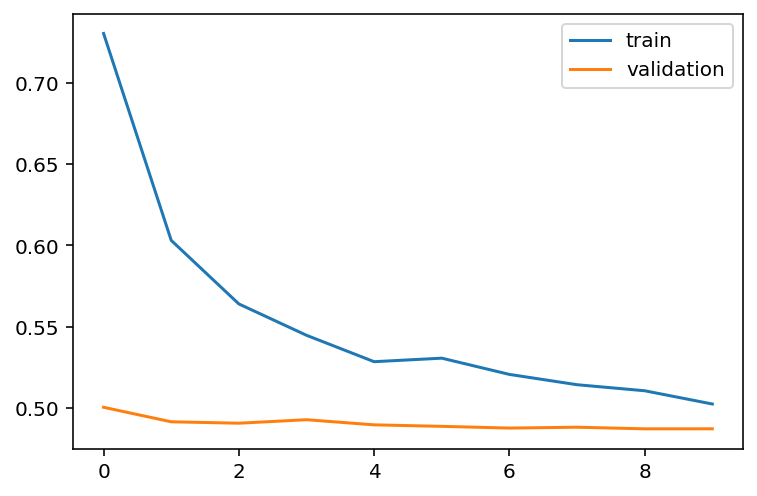

In [ ]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "validation")
plt.legend()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_train_inv = mag_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = mag_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = mag_transformer.inverse_transform(y_pred)

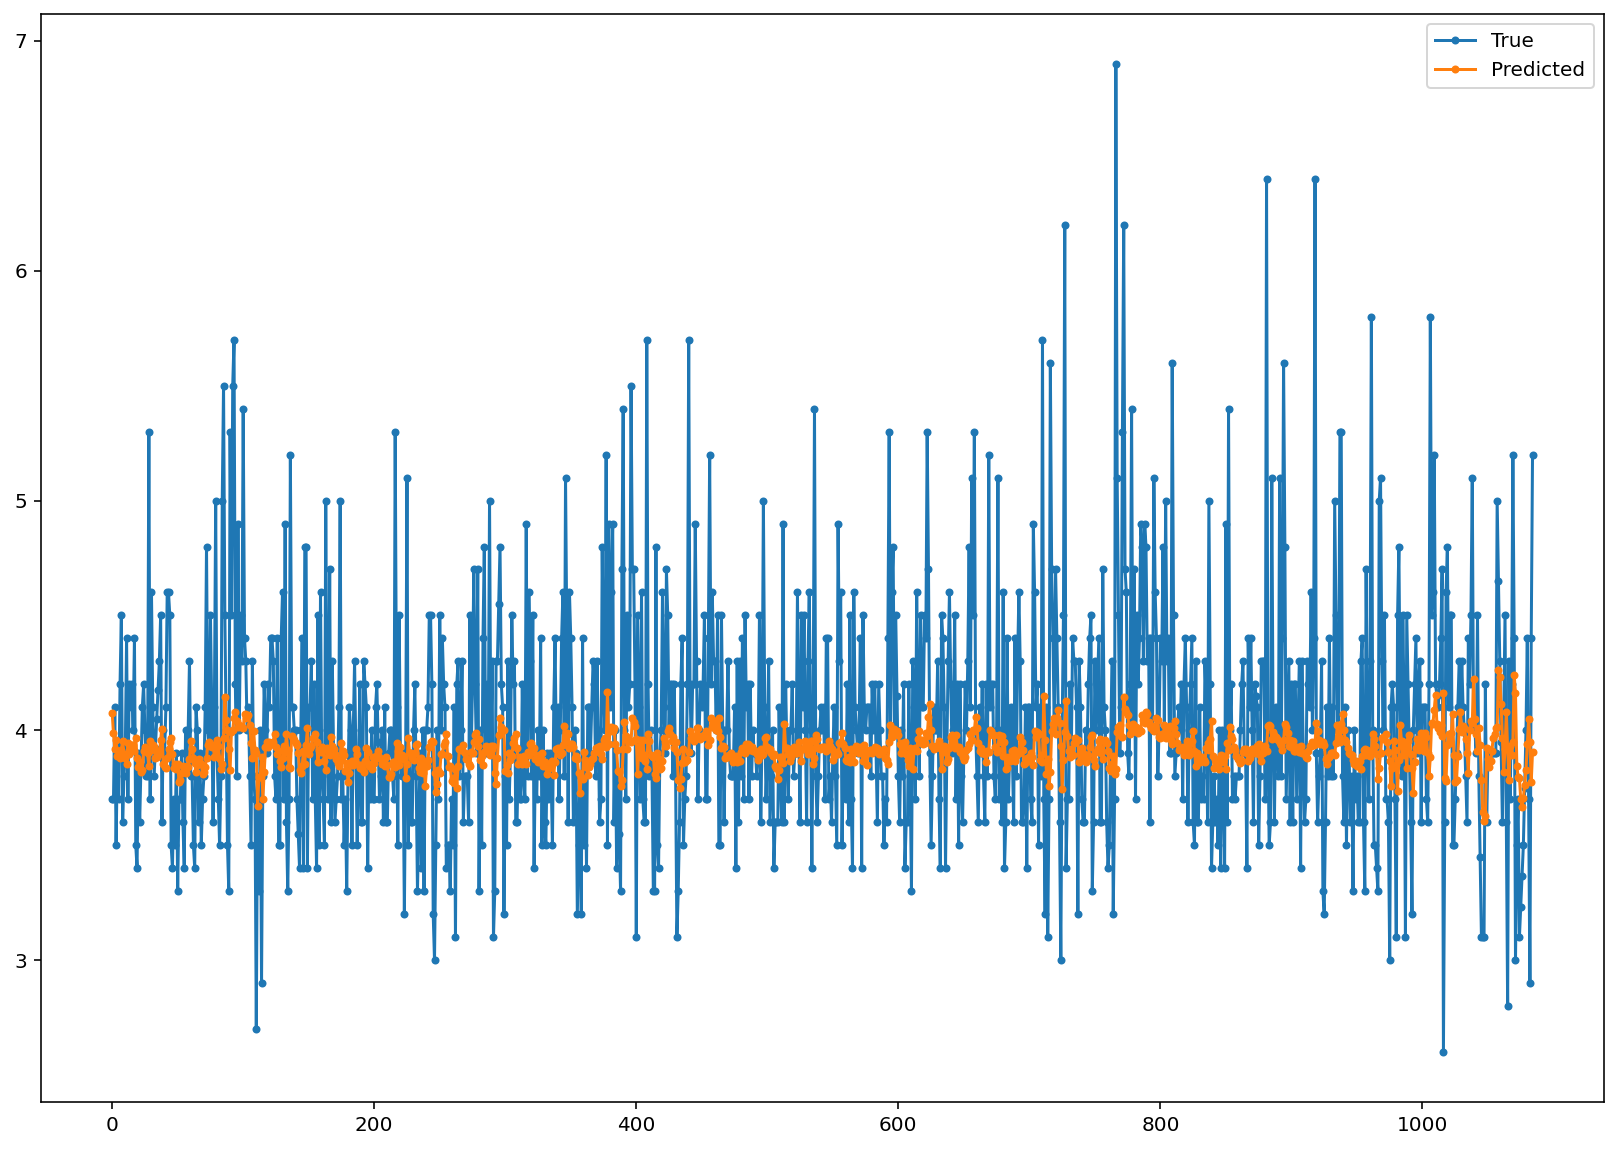

In [ ]:
plt.figure(figsize = (14,10))
plt.plot(y_test_inv.flatten(), marker = '.', label = "True")
plt.plot(y_pred_inv.flatten(), marker = '.', label = "Predicted")
plt.legend()